<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Импортируем-все-необходимое" data-toc-modified-id="Импортируем-все-необходимое-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импортируем все необходимое</a></span></li><li><span><a href="#Загрузим-данные" data-toc-modified-id="Загрузим-данные-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузим данные</a></span></li><li><span><a href="#Обработанные-полученные-данные" data-toc-modified-id="Обработанные-полученные-данные-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обработанные полученные данные</a></span></li><li><span><a href="#Проанализируем-данные" data-toc-modified-id="Проанализируем-данные-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проанализируем данные</a></span></li><li><span><a href="#Займемся-составлением-портрета-пользователя" data-toc-modified-id="Займемся-составлением-портрета-пользователя-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Займемся составлением портрета пользователя</a></span></li><li><span><a href="#Проверим-гипотезы" data-toc-modified-id="Проверим-гипотезы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверим гипотезы</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Гипотеза 1</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Гипотеза 2</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Введение 

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Импортируем все необходимое 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Загрузим данные


In [2]:
frame = pd.read_csv('/datasets/games.csv')

In [3]:
frame.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Обработанные полученные данные

In [4]:
frame.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Заметим, что названия столбцов находятся в разном регистре. Исправим это

In [5]:
frame.columns = frame.columns.str.lower()

Так же приведем к нижнему регистру все значения их столбцов содержащих текст

In [6]:
list_to_lower = ['name','platform','genre','rating']
for column in list_to_lower:
    frame[column] = frame[column].str.lower()

Текстовые значения данных и названия столбцов исправлены

Посмотрим на информацию о данных

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбце 'user_score', кроме пропусков и значений содержится значения "tbd", которые стоит заменить на NaN, так как эта аббревиатура обозначает  "Будет определено" 

In [8]:
frame.loc[frame['user_score'] =='tbd','user_score'] = np.nan

In [9]:
frame['user_score'] = frame['user_score'].astype('float')

In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [11]:
frame[frame['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данных в этих строчках практически нет, поэтому их удаление не нанесет ущерба дальнейшему анализу

In [12]:
frame = frame.dropna(subset = ['name'])

Изучим пропуски в 'year_of_release'

In [13]:
frame[frame['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Их тоже очень мало, поэтому поступим с ними также как и с пропусками в 'user_score'

In [14]:
frame = frame.dropna(subset = ['year_of_release'])

In [15]:
frame[frame['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Создадим Сводную таблицу отражающую медианную оценку пользователей и критиков по каждому жанру

In [16]:
genre_pivot_table = frame.pivot_table(index = 'genre', values = ["critic_score","user_score"], aggfunc = ['median'])

In [17]:
genre_pivot_table = frame.pivot_table(index = 'genre', values = ["critic_score","user_score"], aggfunc = ['median'])
genre_pivot_table.columns = ['critic_score','user_score']

Заменим пропуски в rating на rp, что расшифровывается как «Рейтинг ожидается»

In [19]:
frame.loc[frame.loc[:,'rating'].isnull(),'rating'] = 'rp'

Проверим наличие дубликатов

In [20]:
frame.duplicated().sum()

0

Создадим столбец, отвечающий за общие продажи

In [21]:
frame['total_sales'] = frame.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

Заметим, что в некоторых столбца присутствуют аномальные значения, обработаем их функцией удаления выбросов

In [22]:
frame.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


## Проанализируем данные

In [26]:
years_groupby = frame.groupby('year_of_release').agg({'name':'count'})

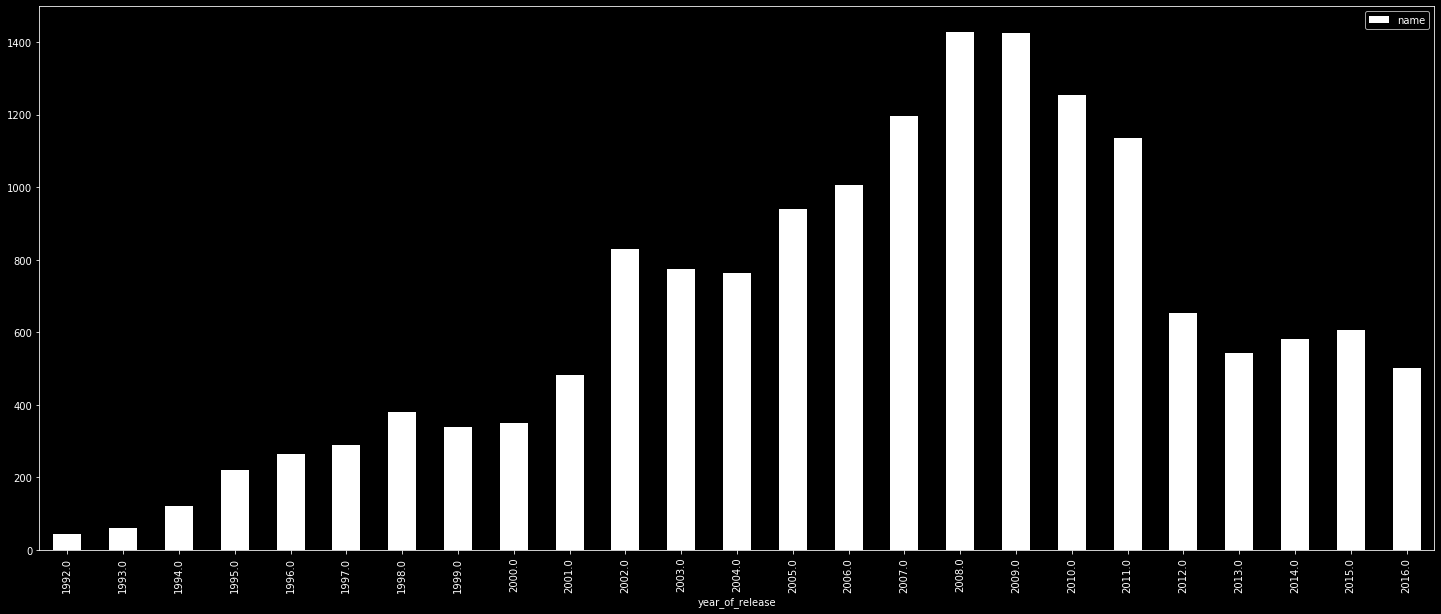

In [27]:
with plt.style.context('dark_background'):
    years_groupby.loc[1992:].plot(y = 'name', kind= 'bar', figsize = (25,10), color = 'w')

Заметим, что больше всего игр было выпущено в период с 2005 по 2011 год

Получим топ-10 популярных платформ

In [28]:
top10_platforms = frame.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending = False)[:10].index

In [29]:
platform_pivot_table_years = frame.pivot_table(index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')

In [30]:
platform_pivot_table_years['years'] =  platform_pivot_table_years.index
platform_pivot_table_years['years'] = platform_pivot_table_years['years'].apply (lambda row: row[1]).astype('int')

In [31]:
platform_pivot_table_years

total_sales  years
platform year_of_release                    
2600     1980.0                 11.38   1980
         1981.0                 35.68   1981
         1982.0                 28.88   1982
         1983.0                  5.84   1983
         1984.0                  0.27   1984
...                               ...    ...
xb       2008.0                  0.18   2008
xone     2013.0                 18.96   2013
         2014.0                 54.07   2014
         2015.0                 60.14   2015
         2016.0                 26.15   2016

[238 rows x 2 columns]

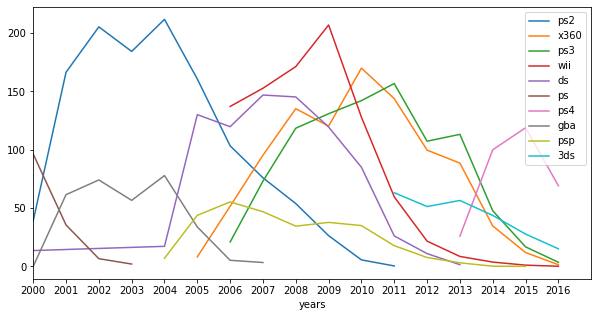

In [32]:
fig, ax = plt.subplots(figsize =(10,5))
for platform in top10_platforms:
    platform_pivot_table_years.loc[platform].plot('years','total_sales', ax=ax)
ax.legend(top10_platforms,prop = {'size':10})
ax.set_xlim([2000,2017])
ax.set_xticks(np.arange(2000,2017))
ax.set_xticklabels(range(2000,2017))
plt.show()

По графику видно, что актуальным периодом можно назвать промежуток между 2013 и 2016 годом

На графике отчетливо видно, что в среднем платформы живут 10-11 лет и начиная с 2006 года новые платформы появляются каждые год, а в некоторый случаях и 2 платформы за 1 год

Выделим актуальный период

In [33]:
period = (2013, 2016)
actual_frame = frame.query('@period[0] <= year_of_release <= @period[1]') 

In [34]:
actual_frame['year_of_release'] = actual_frame['year_of_release'].astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
actual_frame.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,rp,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,rp,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62


In [36]:
actual_frame_pivot_table = actual_frame.pivot_table(index = ['year_of_release','platform'], 
                                                    values = 'total_sales',
                                                    aggfunc = 'sum')

In [37]:
pivot_table_index = actual_frame_pivot_table.index.to_list()

In [38]:
actual_frame_pivot_table["years"] = [year for year, platform in pivot_table_index]

In [39]:
actual_frame_pivot_table.index = [platform for year, platform in pivot_table_index]

In [40]:
actual_frame_pivot_table

,total_sales,years
3ds,56.57,2013
ds,1.54,2013
pc,12.38,2013
ps3,113.25,2013
ps4,25.99,2013
psp,3.14,2013
psv,10.59,2013
wii,8.59,2013
wiiu,21.65,2013
x360,88.58,2013


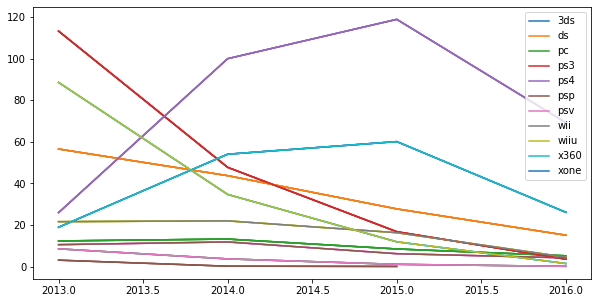

In [41]:
fig, ax = plt.subplots(figsize =(10,5))
for platform in actual_frame_pivot_table.index:
    ax.plot(actual_frame_pivot_table.loc[platform]['years'],
            actual_frame_pivot_table.loc[platform]['total_sales'])
ax.legend(actual_frame_pivot_table.index.unique(),prop = {'size':10})
plt.show()


По данным видно, что практически все платформы находятся в стадии снижения показателя по продажам  Однако, можно выделить платформу ps3 и ps4, которая на протяжении первой половины актуального периода они активно растут, но после 2015 года начинают сдавать позиции. Так же мы можем наблюдать падение продаж ps4, причиной этому стал анонс ps4 про в 2016 году, поэтому не удивительно, что продажи на таких консолях как ps4 снизились. Потенциально прибыльными могут стать xone, wiiu, pc

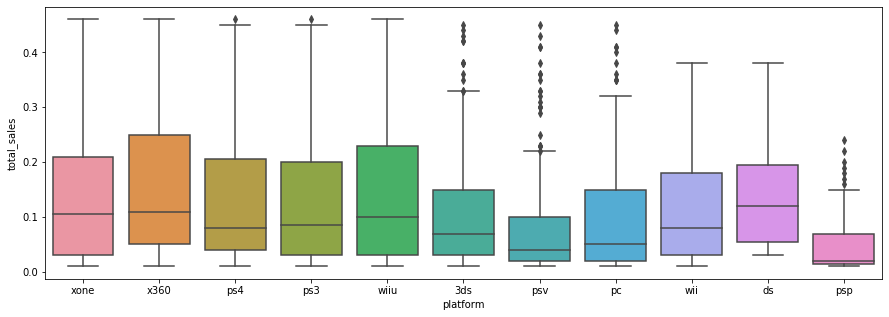

In [42]:
top_quantile = actual_frame['total_sales'].quantile(0.75)
low_quantile = actual_frame['total_sales'].quantile(0.25)
threshold = top_quantile + 2*low_quantile
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = actual_frame.query('total_sales <= @threshold'),ax=ax)  
  

Заметим, что у платформ ps4, ps3  и wii большая часть значений больше медианного. Наиболее равномерно распределены значения у платформы xone, ds

In [43]:
genre_analysis_pivot_table = actual_frame.groupby('genre').agg({'name':'count','total_sales':['median','sum']})

In [44]:
genre_analysis_pivot_table.columns = ['count', 'median','sum']

In [45]:
genre_analysis_pivot_table = genre_analysis_pivot_table.sort_values(by = 'sum', ascending = False)

In [46]:
genre_analysis_pivot_table

,count,median,sum
genre,,,
action,766,0.110,321.87
shooter,187,0.450,232.98
sports,214,0.240,150.65
role-playing,292,0.125,145.89
misc,155,0.100,62.82
platform,74,0.225,42.63
racing,85,0.120,39.89
fighting,80,0.125,35.31
adventure,245,0.030,23.64


Можно заметить, что не всегда количество игр жанра гарантирует хорошие продажи, например, в жанре adventure выпущено много игр, но они имеют очень маленькое медианное значение продаж. Так же можно увидеть, что существуют обратные случаи, когда медианное значение продаж приближается к максимальному, среди всех жанров, но количество игр очень маленькое, примером может служить жанр simulation. Если рассматривать только самые прибыльные жанры, то можно заметить, что в них сочетаются два параметра, у них большое количество игр и высокое медианное значение.

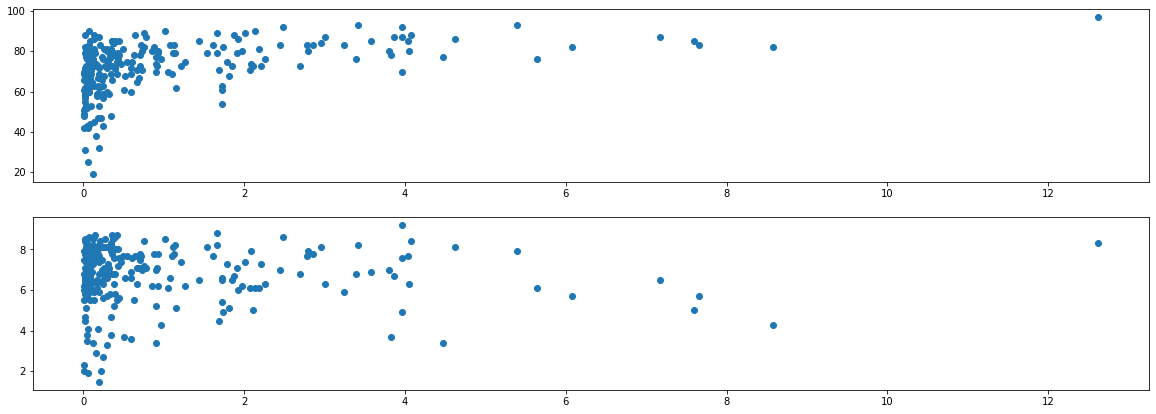

In [47]:

fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,7))
scatter_ax.scatter(y= 'critic_score', x = 'total_sales',data =actual_frame.query('platform == "ps4"').dropna())
scatter_ax2.scatter(y= 'user_score', x = 'total_sales',data =actual_frame.query('platform == "ps4"').dropna())

На графике видно, что корреляция между продажами и оценкой критиков сильнее

In [48]:
ps4_critic_score = actual_frame.query('platform == "ps3"')['critic_score']
ps4_user_score = actual_frame.query('platform == "ps3"')['user_score']
ps4_total_sales = actual_frame.query('platform == "ps3"')['total_sales']

In [49]:
print(ps4_critic_score.corr(ps4_total_sales))
print(ps4_user_score.corr(ps4_total_sales))

0.3342853393371919
0.0023944027357566925


Заметим, что между пользовательской оценкой и продажами есть корреляция, но она небольшая, до 1 процента. В то время как корреляция с оценками критиков достаточно большая, около 33 - 40%.
Это логично, так как если оценки критиков у фильмов хорошие, то большое количество людей решат пойти на него

Заполним пропуски

In [50]:
actual_genre_pivot_table = actual_frame.pivot_table(index = 'genre',
                                             values = ["critic_score","user_score"],
                                             aggfunc = ['median'])
actual_genre_pivot_table.columns = ['critic_score','user_score']

actual_frame[['critic_score','user_score']] = actual_frame['genre'].apply(
    lambda genre: actual_genre_pivot_table.loc[genre])


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


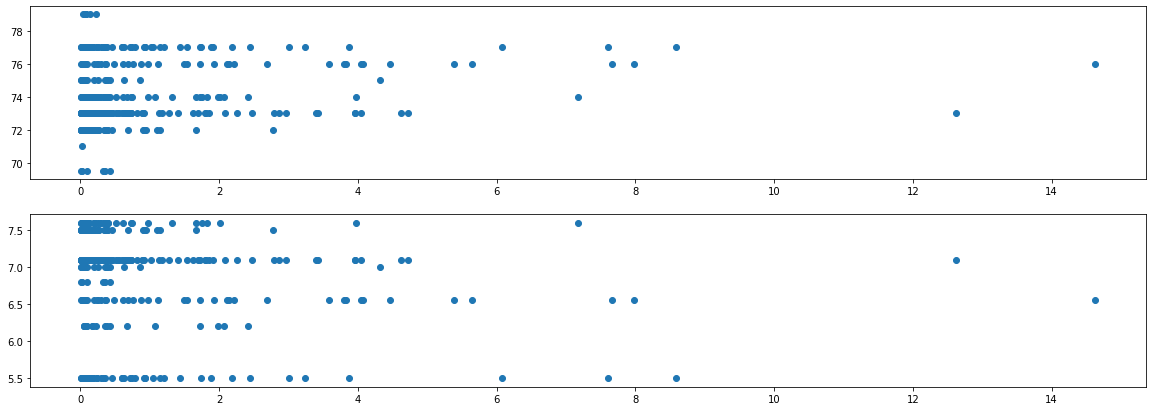

In [51]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,7))
scatter_ax.scatter(y= 'critic_score', x = 'total_sales',data =actual_frame.query('platform == "ps4"'))
scatter_ax2.scatter(y= 'user_score', x = 'total_sales',data =actual_frame.query('platform == "ps4"'))

Распределение стало более упорядоченным, пропало большое количество около нулевых значений


In [52]:
ps4_critic_score_without_outliers = actual_frame.query('platform == "ps3"')['critic_score']
ps4_user_score_without_outliers = actual_frame.query('platform == "ps3"')['user_score']
ps4_total_sales_without_outliers = actual_frame.query('platform == "ps3"')['total_sales']

print(ps4_critic_score_without_outliers.corr(ps4_total_sales_without_outliers))
print(ps4_user_score_without_outliers.corr(ps4_total_sales_without_outliers))

0.08311895345001873
-0.0948707258932652


После заполнения пропусков, доля корреляции сильно упала, а в случае с оценкой пользователей - стала отрицательной

## Займемся составлением портрета пользователя

In [53]:
rating_pivot_table = actual_frame.pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])

In [54]:
rating_pivot_table.columns = ['na_sales','jp_sales','eu_sales']

In [55]:
top5_eu = rating_pivot_table.sort_values(by = 'eu_sales', ascending = False).index[:5]
top5_jp = rating_pivot_table.sort_values(by = 'jp_sales', ascending = False).index[:5]
top5_na = rating_pivot_table.sort_values(by = 'na_sales', ascending = False).index[:5]

In [56]:
list_of_top = [top5_eu,top5_jp,top5_na]
for count,top in enumerate(list_of_top):
    if count == 0: 
        print('Топ платформ для европейского региона:',*top)
    elif count == 1:
        print('Топ платформ для японского региона:',*top)
    elif count == 2:
        print('Топ платформ для сверо американского региона:',*top)
    print()
    for platform in top:
        data = rating_pivot_table.loc[platform,['na_sales','jp_sales','eu_sales']]
        if count == 0: 
            part = data['eu_sales']
        elif count == 1:
            part = data['jp_sales']
        elif count == 2:
            part = data['na_sales']
        ratio = part / sum(data)
        print('Рассмотрим подробнее следующую платформу: ',platform)
        print('Доля продаж',ratio)
        print()

Топ платформ для европейского региона: ps4 xone x360 ps3 3ds

Рассмотрим подробнее следующую платформу:  ps4
Доля продаж 0.40911998194062954

Рассмотрим подробнее следующую платформу:  xone
Доля продаж 0.6419855222337125

Рассмотрим подробнее следующую платформу:  x360
Доля продаж 0.6549041623225601

Рассмотрим подробнее следующую платформу:  ps3
Доля продаж 0.4105780421569894

Рассмотрим подробнее следующую платформу:  3ds
Доля продаж 0.27889318828940624

Топ платформ для японского региона: 3ds ps3 psv ps4 wiiu

Рассмотрим подробнее следующую платформу:  3ds
Доля продаж 0.4950719135577135

Рассмотрим подробнее следующую платформу:  ps3
Доля продаж 0.15097633518686143

Рассмотрим подробнее следующую платформу:  psv
Доля продаж 0.6252943155062242

Рассмотрим подробнее следующую платформу:  ps4
Доля продаж 0.06004740584672089

Рассмотрим подробнее следующую платформу:  wiiu
Доля продаж 0.18151484818151464

Топ платформ для сверо американского региона: ps4 ps3 xone x360 3ds

Рассмотрим по

Заметим, что на большинстве платформ лидирует европейский регион

Выделим лидирующий жанр

In [57]:
top_genre_pivot_table = actual_frame.pivot_table(index = ['genre'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])

In [58]:
top_genre_pivot_table.columns = ['na_sales','jp_sales','eu_sales']

In [59]:
top5_genres_eu = top_genre_pivot_table.sort_values(by = 'eu_sales', ascending = False).index[:5]
top5_genres_jp = top_genre_pivot_table.sort_values(by = 'jp_sales', ascending = False).index[:5]
top5_genres_na = top_genre_pivot_table.sort_values(by = 'na_sales', ascending = False).index[:5]

In [60]:
print('Топ 5 самых популярных жанров в европейском регионе:',*top5_genres_eu)
print('Топ 5 самых популярных жанров в японском регионе:',*top5_genres_jp)
print('Топ 5 самых популярных жанров в северо авереканском регионе:',*top5_genres_na)

Топ 5 самых популярных жанров в европейском регионе: action shooter sports role-playing misc
Топ 5 самых популярных жанров в японском регионе: role-playing action misc fighting shooter
Топ 5 самых популярных жанров в северо авереканском регионе: action shooter sports role-playing racing


In [61]:
esrb_pivot_table = actual_frame.pivot_table(index = ['rating'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])

In [62]:
esrb_pivot_table

sum                  
       eu_sales jp_sales na_sales
rating                           
e         83.36    15.14    79.05
e10+      42.69     5.89    54.24
m        145.32    14.11   165.21
rp        78.91    85.05    89.42
t         41.95    20.59    49.79

Да, влияет, так например у рейтинга е основная доля продаж приходит в европейском регионе, в то время как у рейтинга ес основные продажи проходят в северной Америке

## Проверим гипотезы

### Гипотеза 1

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза : Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [63]:
xone_var = st.variation(actual_frame.query('platform == "xone"')['user_score'])
pc_var = st.variation(actual_frame.query('platform == "pc"')['user_score'])
print('Равны ли дисперсии двух совокупностей?',(xone_var * 0.05 < abs(xone_var - pc_var)))

Равны ли дисперсии двух совокупностей? True


In [64]:
alpha = 0.05

result_first = st.ttest_ind(actual_frame.query('platform == "xone"')['user_score'],
                            actual_frame.query('platform == "pc"')['user_score'])

prob_first = result_first.pvalue
print('р-значение: ',prob_first)
if prob_first < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  0.04872966737294334
Отвергаем нулевую гипотезу


#### Вывод

Дисперсии не равны, но они отличаются меньше чем на 5%, поэтому установим equal_var=True, тест показал, что нулевая гипотеза не подтвердилась. Можем сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC отличаются

### Гипотеза 2

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action ( и Sports  одинаковые

Альтернативна гипотеза: Средние пользовательские рейтинги жанров Action  и Sports разные.

In [65]:
action_var = st.variation(actual_frame.query('genre == "action"')['user_score'])
sports_var = st.variation(actual_frame.query('genre == "sports"')['user_score'])
print('Равны ли дисперсии двух совокупностей?',(((action_var * 0.05) < abs(action_var - sports_var))))

Равны ли дисперсии двух совокупностей? False


In [66]:


result_second = st.ttest_ind(actual_frame.query('genre == "action"')['user_score'],
                             actual_frame.query('genre == "sports"')['user_score'],
                             equal_var=False)
prob_second = result_first.pvalue
print('р-значение: ',prob_second)
if prob_second < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  0.04872966737294334
Отвергаем нулевую гипотезу


#### Вывод

Дисперсии не равны, поэтому установим equal_var=False, тест показал, что нулевая гипотеза не подтвердилась. Можем сделать вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод

Из проведенного анализы мы выяснили, самыми перспективными платформами являются xone, wiiu, pc

Самыми популярными жанрами стали:
1. В европейском регионе: action sports misc racing shooter
1. В японском регионе: action adventure role-playing misc fighting
1. В северо-американском регионе: action sports racing misc shooter

В это же время самыми платформами стали:

1. Для европейского региона: ds wii x360 ps2 xb
1. Для японского региона: psp ds ps2 psv ps3
1. Для северо-американского региона: ps2 ps pc x360 ps3

Кроме того, мы проверили гипотезы и определили:

1. Средние пользовательские рейтинги платформ Xbox One и PC отличаются
1. Средние пользовательские рейтинги жанров Action и Sports разные.

Рейтинг влияет на продажи 

Основываясь на всем выше перечисленном сделаем вывод, что игра имеет больше шансов на успех, если она выходит на Xbox One, а так же на платформе ps4  и новее и pc, относится к жанру action 





